In [2]:
using QuantumOptics
using PyPlot

## Versión Analítica

$$
W(t) = e^{-\vec{n}} \sum_{n=0}^\infty \frac{\vec{n}^n}{n!}cos (2gt\sqrt{n+1})
$$
$$
W(t) = e^{-\vec{n}} \sum_{n=0}^\infty \frac{\vec{n}^n}{n!}cos (\Omega_n t)
$$

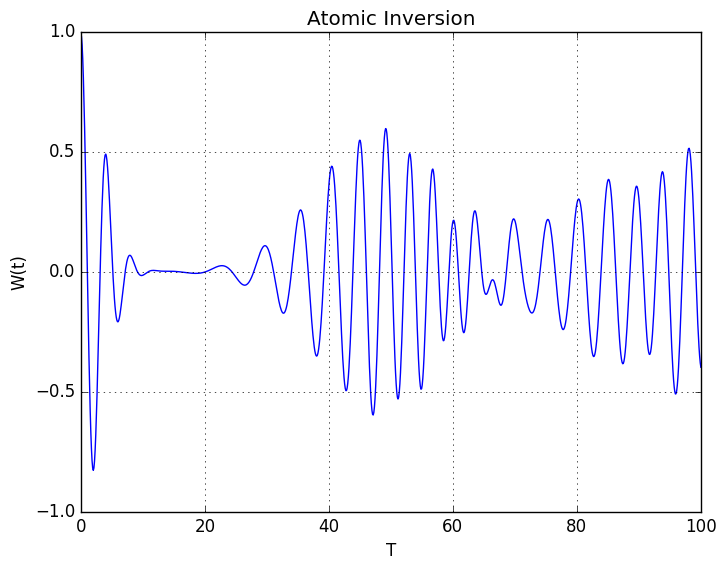

PyObject <matplotlib.text.Text object at 0x7fc041783320>

In [3]:
function atom_inv(η,T)
    g = 2*π*0.05    #Coupling Strength
    # η es el average photon number
    arr = [] #Generamos un arreglo vacío, para luego insertarle los términos que serán sumados.
    
    for n in linspace(0,100,100)        
        push!(arr,((η^n)/factorial(n))*cos(2*g*T*sqrt(n+1)))
    end
    sum(arr)*exp(-η) #sumamos el arreglo antes generado y multiplicamos la exp. 
end

time = linspace(0,100,1000)
atom = [atom_inv(5,i) for i in time]
plot(time, atom)

title("Atomic Inversion")
grid("on")
xlabel("T")
ylabel("W(t)")

## Versión 1 átomo QuantumOptics

In [4]:
ω_C = 2*π       #Cavity Frecuency
ω_A = 2*π       #Atom Frecuency
g = 2*π*0.05    #Coupling Strength
#g = 1
κ = 0.005        #Cavity Dissipation Rate
γ = 0.05        #Atom Dissipation Rate
N = 15          #Number of Cavity Fock States



########################


# Bases
# Definimos las bases en las que trabajaremos. Al final tomamos el producto tensorial para general la base general. 

b_fock = FockBasis(N)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin


########################

# Fundamental operators

a = destroy(b_fock)   #La función destroy : Annihilation operator for the given Fock space 
at = create(b_fock)   #La función create: Creation operator for the given Fock space.
n = number(b_fock)    # number : Number operator for the given Fock space 



sm = sigmam(b_spin)   
sp = sigmap(b_spin)   
sz = sigmaz(b_spin)

Hatom = ω_A*sz/2  # Sección del Hamiltoniano relacionado con el átomo 
Hfield = ω_C*at*a #Probaremos si cambiando n = at*a cambia el asunto.     
Hint = g*(at⊗sm + a⊗sp)

Hint_2 = g*(at⊗sm + a⊗sp + at⊗sp + a⊗sm)

H = identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint

#El siguiente Hamiltoniano no toma encuentra RWA

H_2 = identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint_2;

#Tiempo
T = Array(linspace(0,100,1000));

  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/nicolas/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/nicolas/.julia/v0.5/PyCall/sr

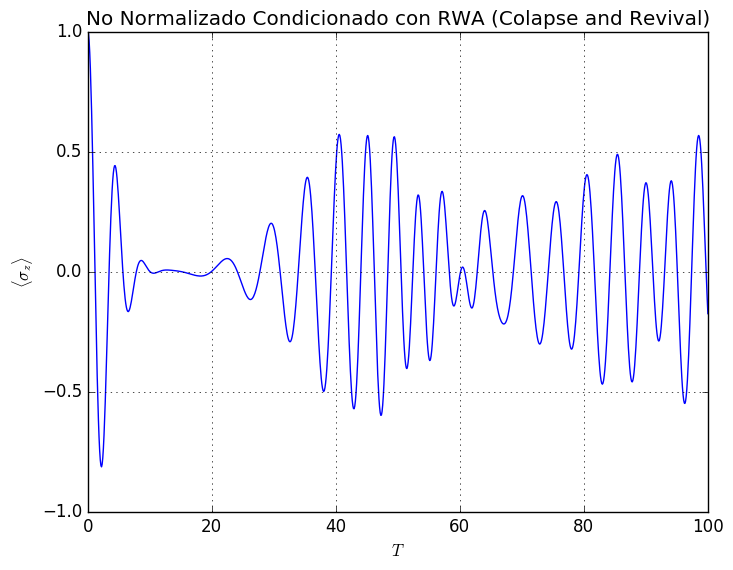

PyObject <matplotlib.text.Text object at 0x7fc041dd8ac8>

In [5]:
ψ_inicial_4 =(coherentstate(b_fock, 2) ⊗ (spinup(b_spin)))
tout, ψ_tiempo_4 = timeevolution.schroedinger(T, ψ_inicial_4, H)
expec_sz_4 = expect(identityoperator(b_fock) ⊗ sz, ψ_tiempo_4)

plot(T,expec_sz_4)
title("No Normalizado Condicionado con RWA (Colapse and Revival)")
grid("on")

xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle")

## Versión 2 Átomos

$$ H_F = \hbar \omega_0 \hat{n} h(\hat{n}) $$

$$ H_A = \frac{\hbar \omega}{2}(\sigma_z^{(1)} + \sigma_z^{(2)}) $$

$$ H_{FA} = \hbar g \sum_{i=1}^2 (\sigma_{+}^{(i)} \hat{a} f(\hat{n}) + \sigma_{-}^{(i)} f(\hat{n}) \hat{a}^\dagger ) $$

$$ H_{AA} = 2 \hbar \kappa (\sigma_{-}^{(1)}\sigma_{+}^{(2)} + \sigma_{+}^{(1)}\sigma_{-}^{(2)}) + \hbar J \sigma_{z}^{(1)}\sigma_{z}^{(2)} $$

$$ H = H_F + H_A + H_{FA} + H_{AA} $$

In [6]:

# Es importante notar el orden en el producto. $ |n\rangle|spin\rangle_1|spin_2\rangle$
sm_1 = sigmam(b_spin) ⊗ identityoperator(b_spin)
sm_2 = identityoperator(b_spin) ⊗ sigmam(b_spin)
sp_1 = sigmap(b_spin) ⊗ identityoperator(b_spin)
sp_2 = identityoperator(b_spin) ⊗ sigmap(b_spin)  
sz_1 = sigmaz(b_spin) ⊗ identityoperator(b_spin)
sz_2 = identityoperator(b_spin) ⊗ sigmaz(b_spin)
Dz = (1/2)*(sz_1 + sz_2)

# Hamiltoniano
H_field = ω_C*at*a
H_atom = (ω_A/2)*(sz_1 + sz_2)
H_field_atom = g* (a ⊗ sp_1 + at ⊗ sm_1) + g* (a ⊗ sp_2 + at ⊗ sm_2)
H_atom_atom = 2*κ*(sm_1*sp_2 + sp_1*sm_2) + γ*sz_1*sz_2

H_1 = H_field ⊗ identityoperator(b_spin) ⊗ identityoperator(b_spin)
H_2 = identityoperator(b_fock) ⊗ H_atom
H_3 = H_field_atom  
H_4 = identityoperator(b_fock) ⊗ H_atom_atom

H = H_1 + H_2 + H_3 + H_4

#Tiempo
tiempo = Array(linspace(0,100,1000));

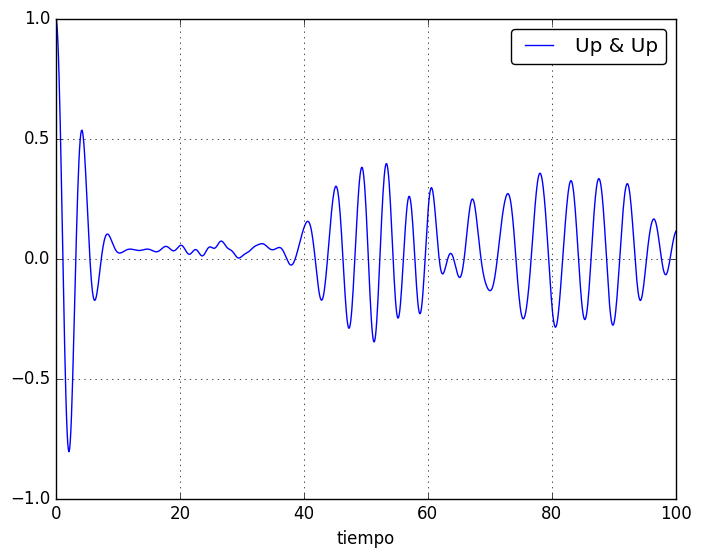

PyObject <matplotlib.legend.Legend object at 0x7fc03eef60f0>

In [7]:
ψ_inicial_up_up = coherentstate(b_fock, 2) ⊗ (spinup(b_spin)) ⊗ (spinup(b_spin))
tout, ψ_evol_up_up = timeevolution.schroedinger(tiempo, ψ_inicial_up_up, H)
expec_up_up = (expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_up_up))

plot(tiempo, expec_up_up, label = "Up & Up")

xlabel("tiempo")
grid("on")
legend(loc="upper right",fancybox="true")

## Juntas

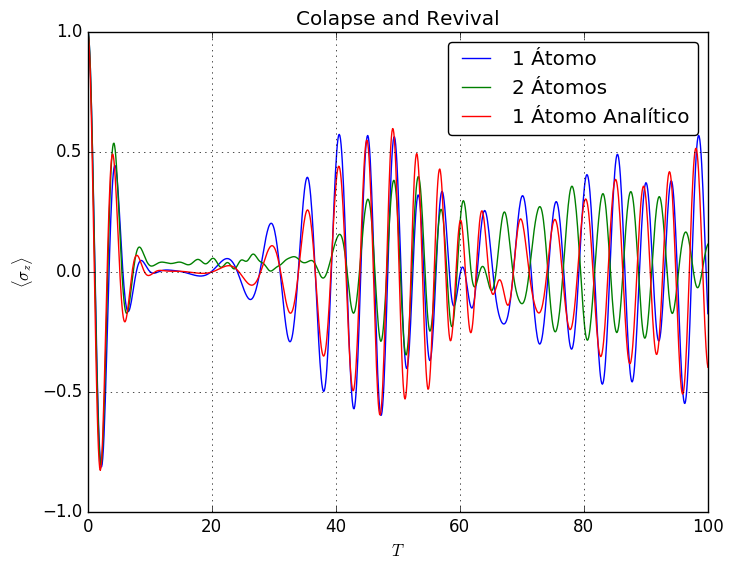

PyObject <matplotlib.legend.Legend object at 0x7fc03ee64898>

In [8]:
plot(T,expec_sz_4, label = "1 Átomo")
plot(tiempo, expec_up_up, label = "2 Átomos")
plot(time, atom, label = "1 Átomo Analítico")


title("Colapse and Revival")
grid("on")
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle")
legend(loc="upper right",fancybox="true")

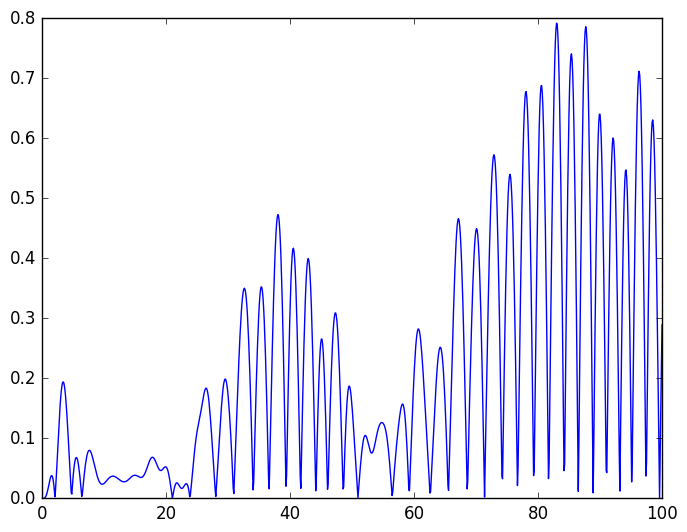

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc03edf7240>

In [9]:
expec_sz_4 = expect(identityoperator(b_fock) ⊗ sz, ψ_tiempo_4)
expec_up_up = (expect(identityoperator(b_fock) ⊗ Dz, ψ_evol_up_up))

resta = []

for i in 1:length(expec_up_up)
    push!(resta, abs(expec_sz_4[i]-expec_up_up[i]))
end
return resta

plot(tiempo, resta)
